# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings('ignore')

# Importa os dados e mostra as primeiras linhas do dataset

In [2]:
df_total = pd.read_csv("cases-brazil-states.csv")
df_total.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df_total[df_total['state'] != 'TOTAL'] # Limpa as informações que não especificam estado
df['date'] = pd.to_datetime(df_total['date']).dt.date # Força as datas para o formato datetime

Text(0, 0.5, 'Óbitos')

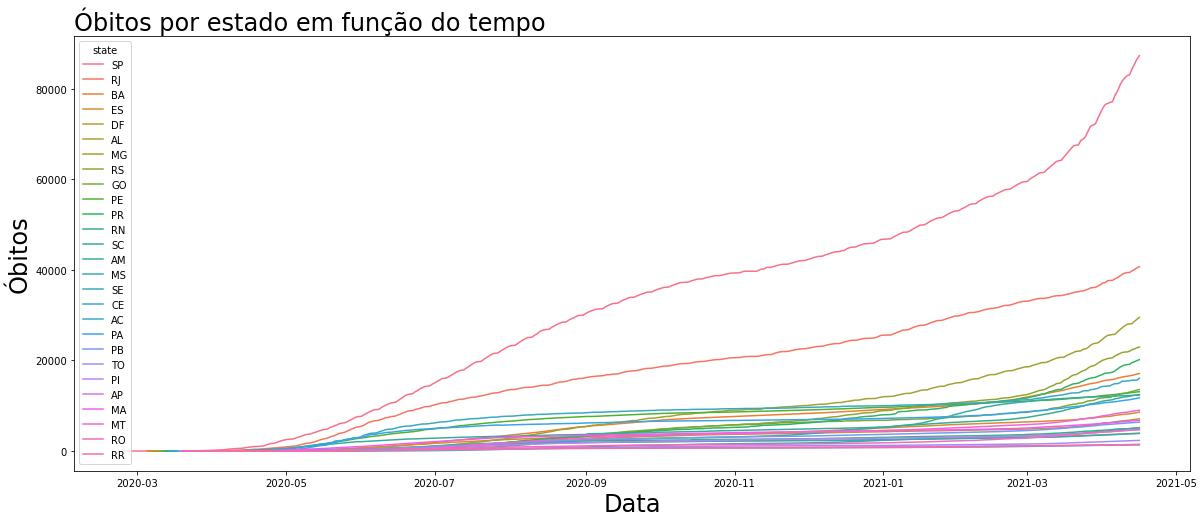

In [6]:
plt.figure(figsize=(20,8)) # cria uma figura 20x8
fig = sns.lineplot(x='date', y='deaths', hue='state', data=df) # plota óbitos em função do tempo
fig.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)

In [11]:
df_rs = df[df['state'] == 'RS'] # Dados apenas do estado do Rio Grande do Sul
df_rs.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
54,11,2020-03-10,Brazil,RS,TOTAL,0,0,1,1,0,...,0.00879,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,11,2020-03-11,Brazil,RS,TOTAL,0,0,1,2,0,...,0.01758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,11,2020-03-12,Brazil,RS,TOTAL,0,0,2,4,0,...,0.03516,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,11,2020-03-13,Brazil,RS,TOTAL,0,0,0,4,0,...,0.03516,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,11,2020-03-14,Brazil,RS,TOTAL,0,0,2,6,0,...,0.05274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Óbitos')

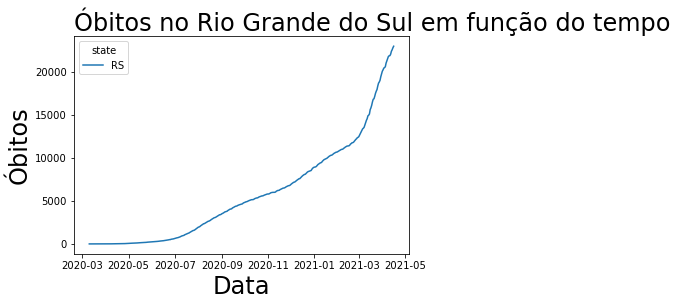

In [12]:
fig = sns.lineplot(x='date', y='deaths', hue='state', data=df_rs) # plota óbitos em função do tempo
fig.set_title('Óbitos no Rio Grande do Sul em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)